# 1- Import libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

--------------------
# 2- Import data and show the first 5 rows.

In [3]:
data = pd.read_csv('D://Admission Predict/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


-----------
# 3- Display last 5 rows of the dataset.

In [19]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


--------------
# 4- Find shape of our dataset.

In [7]:
data.shape
print('Number of rows = ',data.shape[0])
print('Number of columns = ',data.shape[1])

Number of rows =  400
Number of columns =  9


-----------
# 5- Get informations about our dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


-------------
# 6- Check the null values in the dataset.

In [10]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

###### - We haven't any null values in our dataset.

----------------
# 7- Get overall statistics about our dataset.

In [12]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


--------------
# 8- Dropping irrelevant features.

In [13]:
data = data.drop('Serial No.',axis=1)

------------
# 9- Splitting data into X and y.

In [23]:
X = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']

----------
# 10- Splitting the data into the training set and the test set.

In [24]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

--------------
# 11- Features scaling.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [31]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 -----------
 # 12- Import the models.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

---------------
# 13- Model training.

In [33]:
LR = LinearRegression().fit(X_train,y_train)
SVM = SVR().fit(X_train,y_train)
RFR = RandomForestRegressor().fit(X_train,y_train)
GBR = GradientBoostingRegressor().fit(X_train,y_train)

--------------
# 14- Prediction on test data.

In [34]:
y_pred_LR = LR.predict(X_test)
y_pred_SVM = SVM.predict(X_test)
y_pred_RFR = RFR.predict(X_test)
y_pred_GBR = GBR.predict(X_test)

---------------
# 15- Evaluating the algorithm.

In [35]:
from sklearn import metrics

In [37]:
score_LR = metrics.r2_score(y_test,y_pred_LR)
score_SVM = metrics.r2_score(y_test,y_pred_SVM)
score_RFR = metrics.r2_score(y_test,y_pred_RFR)
score_GBR = metrics.r2_score(y_test,y_pred_GBR)

In [38]:
print(score_LR,score_SVM,score_RFR,score_GBR)

0.8212082591486991 0.7597814848647668 0.8032587501021059 0.7976857316856149


In [39]:
final_data = pd.DataFrame({'Models':['LR','SVM','RFR','GBR'],
                          'Accuracy':[score_LR,score_SVM,score_RFR,score_GBR]})
final_data

,Models,Accuracy
0,LR,0.821208
1,SVM,0.759781
2,RFR,0.803259
3,GBR,0.797686


###### - The best model is linear regression.

------------
# 16- Show final data at barplot.

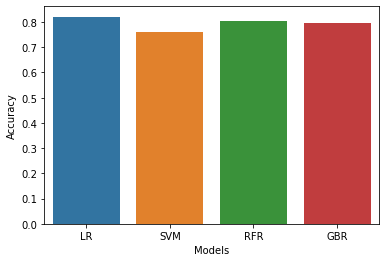

In [42]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])
plt.show()

-----------------
# 17- Classification.

In [44]:
y_train = np.array([1 if value > 0.8 else 0 for value in y_train])
y_test = np.array([1 if value > 0.8 else 0 for value in y_test])

-------------
# 18- Import models.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

-----------
# 19- Model training and evaluation.

In [49]:
GBC = GradientBoostingClassifier().fit(X_train,y_train)
y_pred_GBC = GBC.predict(X_test)
accuracy_score(y_test,y_pred_GBC)

0.975

In [51]:
RFC = RandomForestClassifier().fit(X_train,y_train)
y_pred_RFC = RFC.predict(X_test)
accuracy_score(y_test,y_pred_RFC)

0.9375

In [56]:
SVM = SVC().fit(X_train,y_train)
y_pred_SVM = SVM.predict(X_test)
accuracy_score(y_test,y_pred_SVM)

0.925

In [57]:
LR = LogisticRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
accuracy_score(y_test,y_pred_LR)

0.925

In [58]:
KNC = KNeighborsClassifier().fit(X_train,y_train)
y_pred_KNC = KNC.predict(X_test)
accuracy_score(y_test,y_pred_KNC)

0.8875

In [62]:
final_data = pd.DataFrame({'Models':['GBC','RFC','SVM','LR','KNC'],
                          'Accuracy':[accuracy_score(y_test,y_pred_GBC),
                                     accuracy_score(y_test,y_pred_RFC),
                                     accuracy_score(y_test,y_pred_SVM),
                                     accuracy_score(y_test,y_pred_LR),
                                     accuracy_score(y_test,y_pred_KNC)]})
final_data

,Models,Accuracy
0,GBC,0.9750
1,RFC,0.9375
2,SVM,0.9250
3,LR,0.9250
4,KNC,0.8875


##### -The best model is GradientBoostingClassifier.

------------
# 20- Final model.

In [63]:
X = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']

In [66]:
y = np.array([1 if value > 0.8 else 0 for value in y])

In [69]:
X = sc.fit_transform(X)

In [70]:
GR = GradientBoostingClassifier()
GR.fit(X,y)

GradientBoostingClassifier()

----------
# 21- Saving model.

In [71]:
import joblib

In [72]:
joblib.dump(GR,'Admission_model')

['Admission_model']

In [73]:
model = joblib.load('Admission_model')

In [74]:
model.predict([[337,118,4,4.5,4.5,9.65,1]])

array([1])

---------------
# 22- GUI

In [75]:
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler

In [86]:
def show_entry():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = int(e7.get())
    model = joblib.load('Admission_model')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7]])
    if result == 1:
        Label(master,text='You will get admission').grid(row=9)
    else:
        Label(master,test='You wont get admission')

master = Tk()
master.title('Graduate Admission Analysis and Prediction')
label = Label(master,text='Graduate Admission Analysis and Prediction',bg='black',fg='white').grid(row=0,columnspan=2)
Label(master,text='Enter your GRE score').grid(row=1)
Label(master,text='Enter your Toefl score').grid(row=2)
Label(master,text='Enter university rating').grid(row=3)
Label(master,text='Enter SOP').grid(row=4)
Label(master,text='Enter LOR').grid(row=5)
Label(master,text='Enter your CPGA').grid(row=6)
Label(master,text='Reasearch').grid(row=7)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)

Button(master,text='Predict',command=show_entry).grid()

mainloop()